# WINE QUALITY PREDICTION PROJECT

## CSE-221710310043-M.Rangabhagavan Reddy

### IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing

### Versions of Packages

In [2]:
import pkg_resources
# list packages to be checked
root_packages = [
    'geoviews', 'geopandas', 'pandas', 'numpy', 
    'matplotlib', 'shapely', 'cartopy', 'holoviews',
    'mapclassify', 'fiona', 'bokeh']
# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

pandas==0.25.1
numpy==1.16.5
matplotlib==3.1.1
bokeh==1.3.4


### Importing the Dataset

In [3]:
df= pd.read_csv("wine.csv",sep=',')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


### Displaying the top 10 in dataset

In [4]:
# Displaying top 10 in dataset
df.head(10)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [5]:
from sklearn.preprocessing import LabelEncoder
df['color']=LabelEncoder().fit_transform(df.color)
df.head(200)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,7.8,0.590,0.33,2.0,0.074,24.0,120.0,0.9968,3.25,0.54,9.4,5,0
196,7.3,0.580,0.30,2.4,0.074,15.0,55.0,0.9968,3.46,0.59,10.2,5,0
197,11.5,0.300,0.60,2.0,0.067,12.0,27.0,0.9981,3.11,0.97,10.1,6,0
198,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.9924,3.57,0.85,13.0,7,0


In [6]:
df["fixed_acidity"].value_counts()

6.8     354
6.6     327
6.4     305
7.0     282
6.9     279
       ... 
13.8      1
3.8       1
13.5      1
13.4      1
12.1      1
Name: fixed_acidity, Length: 106, dtype: int64

In [7]:
# The function dataframe. isnull(). sum(). sum() returns the number of missing values in the data set.
df.isnull().sum()


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [8]:
# The info() function is used to print a concise summary of a DataFrame
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed_acidity           6497 non-null float64
volatile_acidity        6497 non-null float64
citric_acid             6497 non-null float64
residual_sugar          6497 non-null float64
chlorides               6497 non-null float64
free_sulfur_dioxide     6497 non-null float64
total_sulfur_dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null int32
dtypes: float64(11), int32(1), int64(1)
memory usage: 634.6 KB


In [9]:
df.describe() 
#This function gives the mean, std and IQR values. And, function excludes the character columns and given summary about numeric columns

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


### Heatmap which is displaying

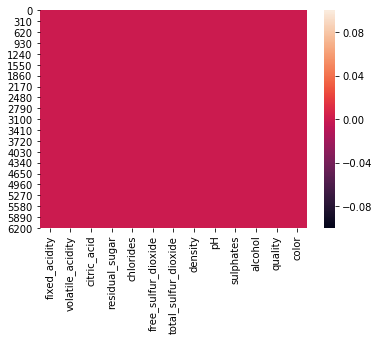

In [10]:
sns.heatmap(df.isnull())

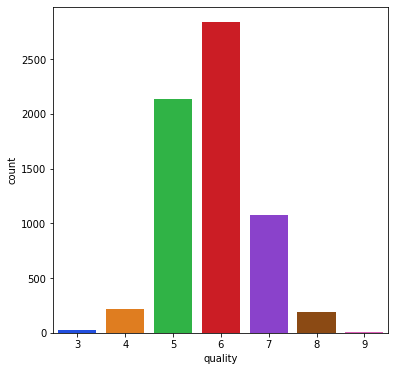

In [11]:
# Frequency of various quality of wine
plt.figure(figsize=(6,6))
sns.countplot(df["quality"],palette="bright")

### Datatype convertion

In [12]:
quality = df["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")
category = pd.DataFrame(data=category, columns=["category"])
df = pd.concat([df, category], axis=1)
df.drop(columns="quality", axis=1, inplace=True)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [13]:
df["category"].value_counts()

Medium    4974
High      1277
Low        246
Name: category, dtype: int64

## Visualizing the color features in Dataset

### Visualizing the data plots on all features which is there in data set
- Visualizing the fixed_acidity feature in data set, In this fixed acidity and category low values are greater than medium, high values.

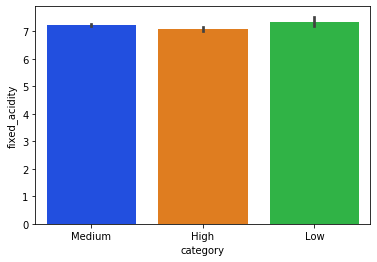

In [14]:
sns.barplot(x='category',y='fixed_acidity',data=df,palette="bright")

- Visualizing the Citric_acid feature in data set, In this citric-acid and category High values is greater than medium, low values

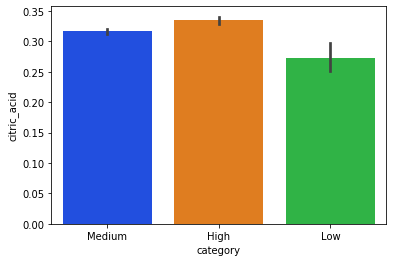

In [15]:
sns.barplot(x='category',y='citric_acid',data=df,palette="bright")

- Visualizing the Residual_sugar feature in data set, In this Residual_sugar and category medium value is greater than high and low values

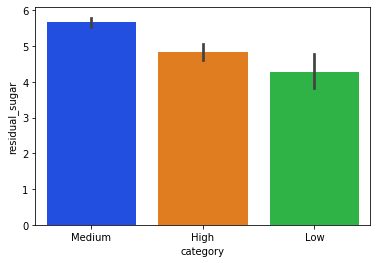

In [16]:
sns.barplot(x='category',y='residual_sugar',data=df,palette="bright")

- Visualizing the chlorides feature in data set, In this chlorides and category low values are greater than medium, high values.

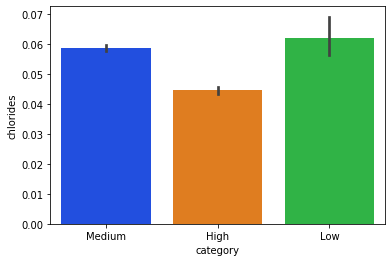

In [17]:
sns.barplot(x='category',y='chlorides',data=df,palette="bright")

- Visualizing the free_sulfur_dioxide feature in data set, In this free_sulfur_dioxide and category high values are greater than medium, low values.

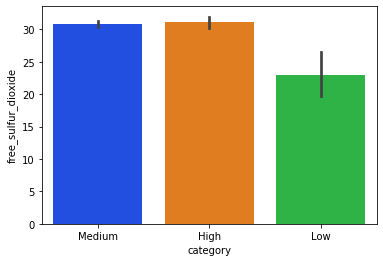

In [18]:
sns.barplot(x='category',y='free_sulfur_dioxide',data=df,palette="bright")

- Visualizing the total_sulfur_dioxide feature in data set, In this total_sulfur_dioxide and category medium values are greater than high, low values.

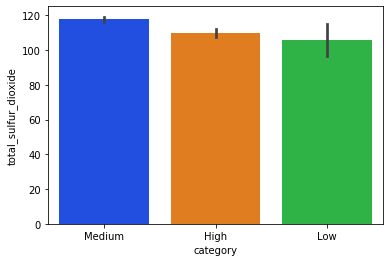

In [19]:
sns.barplot(x='category',y='total_sulfur_dioxide',data=df,palette="bright")

- Visualizing the density feature in data set, In this density and category medium, high, low are having same values.

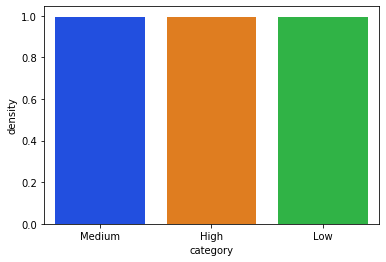

In [20]:
sns.barplot(x='category',y='density',data=df,palette="bright")

- Visualizing the pH feature in data set, In this pH and category low, medium, high are all having equal values.

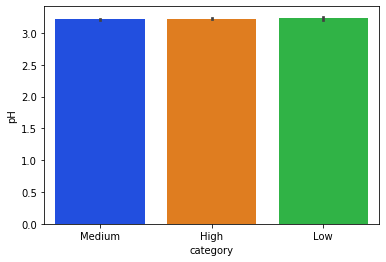

In [21]:
sns.barplot(x='category',y='pH',data=df,palette="bright")

- Visualizing the sulphates feature in data set, In this sulphates and category high values are greater than medium, low values.

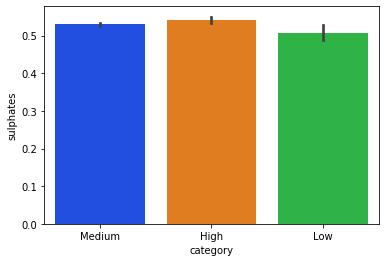

In [22]:
sns.barplot(x='category',y='sulphates',data=df,palette="bright")

- Visualizing the alcohol feature in data set, In this alcohol and category high values are greater than medium, low.

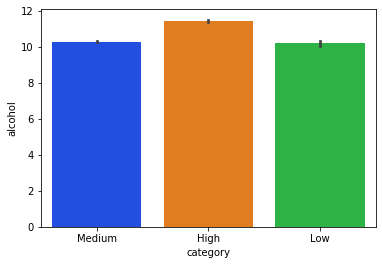

In [23]:
sns.barplot(x='category',y='alcohol',data=df,palette="bright")

- Visualizing the color feature in data set, In this color and category high values are greater than low, medium values.

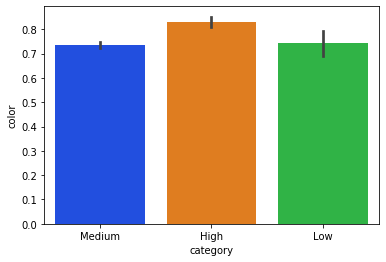

In [24]:
sns.barplot(x='category',y='color',data=df,palette="bright")

In [25]:
### labelencoder_y = LabelEncoder()
### y = labelencoder_y.fit_transform(quality)
### y = y.fit_transform(quality)

In [26]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [27]:
X= pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1.0


In [28]:
y= pd.DataFrame(y)
y

,0
0,Medium
1,Medium
2,Medium
3,Medium
4,Medium
...,...
6492,Medium
6493,Medium
6494,Medium
6495,High


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4872, 12)
(1625, 12)
(4872, 1)
(1625, 1)


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train=scaler.fit_transform(X_train)
scaled_X_train

array([[ 0.53229906,  1.25202415, -1.7825166 , ...,  0.92100486,
         0.17076055, -1.73299936],
       [ 1.23056536, -0.85087198,  0.77030435, ...,  1.72635377,
        -1.43127486,  0.57703426],
       [ 1.4633208 , -0.36324389,  1.18427531, ..., -0.48835573,
        -0.33514537,  0.57703426],
       ...,
       [-0.16596724, -0.66801144,  0.70130919, ...,  0.38410559,
        -0.25082771,  0.57703426],
       [-0.01079695,  1.77012899, -2.19648757, ...,  0.31699318,
        -1.26263955, -1.73299936],
       [-1.17457411, -0.72896496, -0.67859403, ..., -0.35413091,
        -1.26263955,  0.57703426]])

In [33]:
y_train

,0
275,Medium
3406,Medium
3163,Medium
4623,Medium
2527,Medium
...,...
905,Medium
5192,High
3980,Medium
235,Medium


In [34]:
X_train_scaled = preprocessing.scale(X_train)
X_train_scaled

array([[ 0.53229906,  1.25202415, -1.7825166 , ...,  0.92100486,
         0.17076055, -1.73299936],
       [ 1.23056536, -0.85087198,  0.77030435, ...,  1.72635377,
        -1.43127486,  0.57703426],
       [ 1.4633208 , -0.36324389,  1.18427531, ..., -0.48835573,
        -0.33514537,  0.57703426],
       ...,
       [-0.16596724, -0.66801144,  0.70130919, ...,  0.38410559,
        -0.25082771,  0.57703426],
       [-0.01079695,  1.77012899, -2.19648757, ...,  0.31699318,
        -1.26263955, -1.73299936],
       [-1.17457411, -0.72896496, -0.67859403, ..., -0.35413091,
        -1.26263955,  0.57703426]])

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scaling for train data we use fit_transform 
# cuz in fit when it comes to the train it finds mean and variance
# based on mean and variance it will apply it to the train data

scaled_X_train=pd.DataFrame(scaler.fit_transform(X_train),
                            columns=X_train.columns)
scaled_X_train

# scaling for test data and for test we should only use transform
# cuz in fit when it comes to the train it finds mean and variance
# based on mean and variance it will apply it to the train data

scaled_X_test=pd.DataFrame(scaler.transform(X_test),
                            columns=X_train.columns)
scaled_X_test

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.299544,-0.119430,1.805232,2.399438,-0.179008,0.695605,0.838384,1.744783,-0.430410,0.048544,-1.094004,0.577034
1,-1.174574,-0.607058,1.046285,0.189415,0.348527,0.248568,1.173731,-0.260688,-0.680182,-0.488356,-0.644310,0.577034
2,0.299544,0.124384,0.839300,0.612386,5.512815,-0.142589,0.467738,0.372090,-0.617739,-0.689693,-0.250828,0.577034
3,0.144373,0.794873,0.977290,-0.677676,1.597951,-1.316061,-1.685539,0.596408,0.631120,0.652555,0.002125,-1.732999
4,2.084002,0.916780,-0.609599,-0.635379,0.848297,-0.645506,-0.008807,0.037286,-2.803242,-0.622581,-0.925369,0.577034
...,...,...,...,...,...,...,...,...,...,...,...,...
1620,-0.786648,-0.546104,-0.057638,-0.466191,-0.734308,0.080929,0.608937,-1.522897,-0.243081,-1.495042,1.266890,0.577034
1621,-0.321138,-1.155640,0.632314,1.585219,-0.345598,2.735210,1.191381,0.914471,0.131576,1.659241,-0.250828,0.577034
1622,0.066788,-0.789918,-0.747589,-0.804567,-0.290068,0.248568,0.308890,-0.009586,1.005778,-0.488356,-0.419463,0.577034
1623,-0.476308,1.709175,-0.816584,0.696980,-0.290068,2.819029,1.915023,0.455790,-0.305524,-0.622581,-1.009687,0.577034


### KNN (K – nearest neighbour algorithm)

### Knn applying and importing

In [36]:
# model building
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7,metric="euclidean")
# applying on the the data set
knn.fit(scaled_X_train,y_train)

C:\Users\Vardhan reddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [37]:
# predictions on the data
# predict function
# syntax objectname.predict(input)
y_train_predict=knn.predict(scaled_X_train)
y_train_predict

array(['Medium', 'Medium', 'Medium', ..., 'Medium', 'Medium', 'Medium'],
      dtype=object)

In [38]:
from sklearn.metrics import accuracy_score
scores=[]
# checking for optimum k value
# building the model with multiple k values
for k in range(1,20):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    pred_test=knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test,pred_test))
scores

C:\Users\Vardhan reddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Vardhan reddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Vardhan reddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Vardhan reddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Vardhan red

[0.7913846153846154,
 0.7452307692307693,
 0.7901538461538462,
 0.7704615384615384,
 0.796923076923077,
 0.792,
 0.8024615384615384,
 0.7883076923076923,
 0.796923076923077,
 0.7858461538461539,
 0.7883076923076923,
 0.784,
 0.7963076923076923,
 0.7901538461538462,
 0.7883076923076923,
 0.7895384615384615,
 0.7876923076923077,
 0.788923076923077,
 0.7870769230769231]

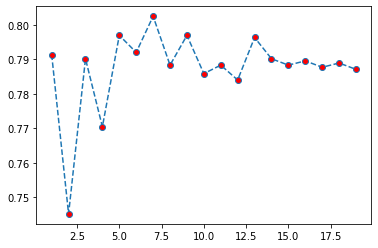

In [39]:
# plot of kavlues and scores
plt.plot(range(1,20),scores,marker='o',markerfacecolor="r",linestyle="--")

In [40]:
# optimun k value is 7
final_model=KNeighborsClassifier(n_neighbors=7,metric="euclidean")
final_model.fit(scaled_X_train,y_train)

C:\Users\Vardhan reddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [41]:
# predicting on the training data
final_train_pred=final_model.predict(scaled_X_train)
final_train_pred

array(['Medium', 'Medium', 'Medium', ..., 'Medium', 'Medium', 'Medium'],
      dtype=object)

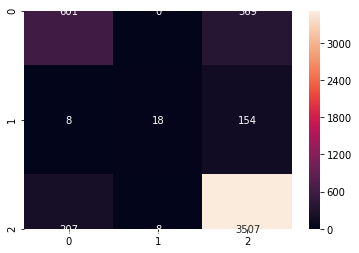

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(confusion_matrix(y_train,final_train_pred),annot=True,fmt="d",annot_kws={"ha":"center","va":"center"})

In [43]:
# classification report 
# prediction-->PPV-->out of the positive values,how many true positives are there
print(classification_report(y_train,final_train_pred))

              precision    recall  f1-score   support

        High       0.74      0.62      0.67       970
         Low       0.69      0.10      0.17       180
      Medium       0.87      0.94      0.90      3722

    accuracy                           0.85      4872
   macro avg       0.77      0.55      0.58      4872
weighted avg       0.84      0.85      0.83      4872



In [44]:
 from sklearn.metrics import accuracy_score
accuracy_score(y_train,final_train_pred)

0.84688013136289

In [45]:
# prediction on test data 
final_test_pred=final_model.predict(scaled_X_test)
final_test_pred

array(['Medium', 'Medium', 'Medium', ..., 'High', 'Medium', 'High'],
      dtype=object)

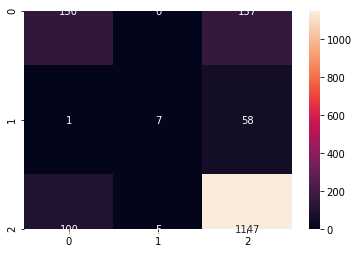

In [46]:
# confusion matrics
sns.heatmap(confusion_matrix(y_test,final_test_pred),annot=True,fmt="d")

In [47]:
# checking the accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test,final_test_pred))

              precision    recall  f1-score   support

        High       0.60      0.49      0.54       307
         Low       0.58      0.11      0.18        66
      Medium       0.84      0.92      0.88      1252

    accuracy                           0.80      1625
   macro avg       0.67      0.50      0.53      1625
weighted avg       0.79      0.80      0.79      1625



In [48]:
accuracy_score(y_test,final_test_pred)

0.8024615384615384

In [49]:
print(knn.predict([[5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0]]))

['Medium']


In [50]:
print(knn.predict([[6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0]]))

['Medium']


In [51]:
print(knn.predict([[5.7,1.13,0.09,1.5,0.172,7,19,0.994,3.5,0.48,9.8,1]]))

['Low']


In [52]:
print(knn.predict([[2.3,0.13,0.39,4.5,0.002,5,15,0.094,1.5,0.08,11.8,0]]))

['Medium']


### Bernoulli naive bayes algorithm 

In [53]:
# applying the neive bayes algorithmn
#import bernolis neive bayes algorithm
from sklearn.naive_bayes import BernoulliNB
#creating an object
model_BernNB=BernoulliNB()

In [54]:
# applying the algorithm to the data
#object.fit(input,output)
model_BernNB.fit(X_train,y_train)

C:\Users\Vardhan reddy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [55]:
final_train_pred=final_model.predict(scaled_X_train)
final_train_pred

array(['Medium', 'Medium', 'Medium', ..., 'Medium', 'Medium', 'Medium'],
      dtype=object)

In [56]:
y_test_pred=model_BernNB.predict(X_test)

In [57]:
# Checking the f1 score of test
print(classification_report(y_train,final_train_pred))

              precision    recall  f1-score   support

        High       0.74      0.62      0.67       970
         Low       0.69      0.10      0.17       180
      Medium       0.87      0.94      0.90      3722

    accuracy                           0.85      4872
   macro avg       0.77      0.55      0.58      4872
weighted avg       0.84      0.85      0.83      4872



In [58]:
# Checking the f1 score of test
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00       307
         Low       0.00      0.00      0.00        66
      Medium       0.77      1.00      0.87      1252

    accuracy                           0.77      1625
   macro avg       0.26      0.33      0.29      1625
weighted avg       0.59      0.77      0.67      1625



C:\Users\Vardhan reddy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### DTC (Decision tree classifier algorithm)

In [59]:
# Importing the decision tree classifier algorithm and Applying the DTC algorithm
from sklearn import tree
DTC=tree.DecisionTreeClassifier(random_state=15)
DTC.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=15, splitter='best')

In [60]:
# predicting the y_train_pred from X_train
y_train_pred=DTC.predict(X_train)
y_train_pred


array(['Medium', 'Medium', 'Medium', ..., 'Medium', 'Medium', 'Medium'],
      dtype=object)

In [61]:
y_test_pred=DTC.predict(X_test)
y_test_pred

array(['Medium', 'Medium', 'Medium', ..., 'Medium', 'Medium', 'High'],
      dtype=object)

In [62]:
# Checking the f1 score of train
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       970
         Low       1.00      1.00      1.00       180
      Medium       1.00      1.00      1.00      3722

    accuracy                           1.00      4872
   macro avg       1.00      1.00      1.00      4872
weighted avg       1.00      1.00      1.00      4872



In [63]:
# checking the f1 score of test
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

        High       0.57      0.64      0.61       307
         Low       0.32      0.35      0.33        66
      Medium       0.88      0.85      0.86      1252

    accuracy                           0.79      1625
   macro avg       0.59      0.61      0.60      1625
weighted avg       0.80      0.79      0.79      1625



### Random forest classifier 

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=15)
rfc.fit(X_train,y_train)

C:\Users\Vardhan reddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Vardhan reddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=15, verbose=0,
                       warm_start=False)

In [65]:
# predicting the y_pred_train from X_train
y_predict_train=rfc.predict(X_train)
y_predict_train

array(['Medium', 'Medium', 'Medium', ..., 'Medium', 'Medium', 'Medium'],
      dtype=object)

In [66]:
# predicting the y_predict_test from X_test
y_predict_test=rfc.predict(X_test)
y_predict_test

array(['Medium', 'Medium', 'Medium', ..., 'Medium', 'Medium', 'Medium'],
      dtype=object)

In [67]:
# checking the f1 score in train
print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

        High       0.99      0.98      0.99       970
         Low       1.00      0.93      0.96       180
      Medium       0.99      1.00      0.99      3722

    accuracy                           0.99      4872
   macro avg       0.99      0.97      0.98      4872
weighted avg       0.99      0.99      0.99      4872



In [68]:
# Checking the f1 score in test
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

        High       0.67      0.60      0.63       307
         Low       0.86      0.18      0.30        66
      Medium       0.87      0.93      0.90      1252

    accuracy                           0.84      1625
   macro avg       0.80      0.57      0.61      1625
weighted avg       0.83      0.84      0.82      1625



In [69]:
print(rfc.predict([[7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0]]))

['Medium']


In [70]:
print(rfc.predict([[5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.9924,3.57,0.85,13.0,0]]))

['High']


In [71]:
print(rfc.predict([[6.9,1.090,0.06,2.1,0.061,12.0,31.0,0.9948,3.51,0.43,11.4,0]]))

['Medium']


In [72]:
print(rfc.predict([[11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0]]))

['Medium']


In [73]:
print(rfc.predict([[5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.9924,3.57,0.85,13.0,0]]))

['High']


### Predictions from raw data which is collected from kaggle (Red wine)

In [74]:
print(rfc.predict([[7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,0]]))

['Medium']


In [75]:
print(rfc.predict([[11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,0]]))

['Medium']


In [76]:
print(rfc.predict([[6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,0]]))


['Medium']


In [77]:
print(rfc.predict([[6.9,0.605,0.12,10.7,0.073,40,83,0.9993,3.45,0.52,9.4,0]]))

['Medium']


In [78]:
print(rfc.predict([[6.9,0.84,0.21,4.1,0.074,16,65,0.99842,3.53,0.72,9.233333333,0]]))


['Medium']
